In [12]:
import numpy as np
import os
import librosa
import librosa.feature
import librosa.display
import sounddevice
from scipy.signal import butter, lfilter
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

## Filtering a song to extract the right features

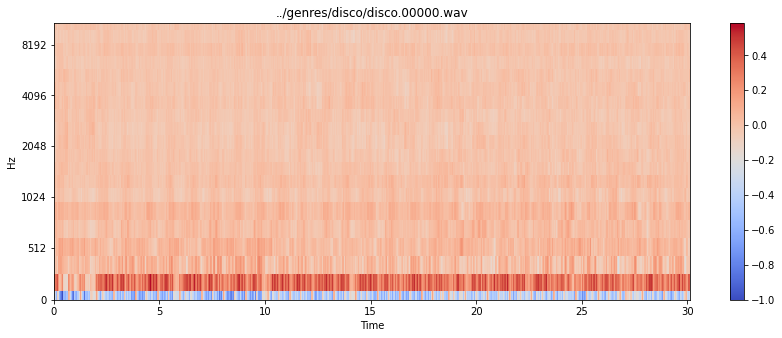

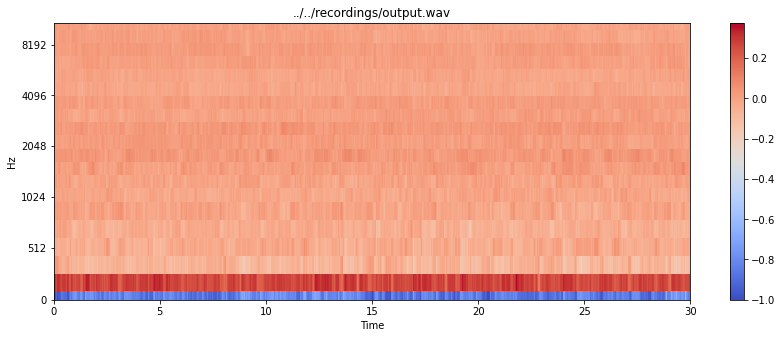

In [13]:
def display_feature(song):
    y, sr = librosa.load(song)

    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_mels=128,n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max)
    
    mfcc = librosa.feature.mfcc(y)
    mfcc /= np.amax(np.absolute(mfcc))
    
    sc = librosa.feature.spectral_centroid(y=y, sr=sr,n_fft=2048, hop_length=1024)
    
    plt.figure(figsize=(12,4.8))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    #plt.show()
    
# get a song
test_genre = "disco"
some_audio = "../genres/" + test_genre + "/" + test_genre + ".00000.wav"
recorded_audio = "../../recordings/output.wav"

data, samplerate = librosa.load(some_audio)
    
display_feature(some_audio)
display_feature(recorded_audio)

## Butter bandpass (deprecated)

This filter does not work well, so I decided to use the one below

In [14]:
lowcut = 10.0
highcut = 8000.0
FRAME_RATE = samplerate

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bandpass_filter(buffer):
    return butter_bandpass_filter(buffer, lowcut, highcut, FRAME_RATE, order=6)

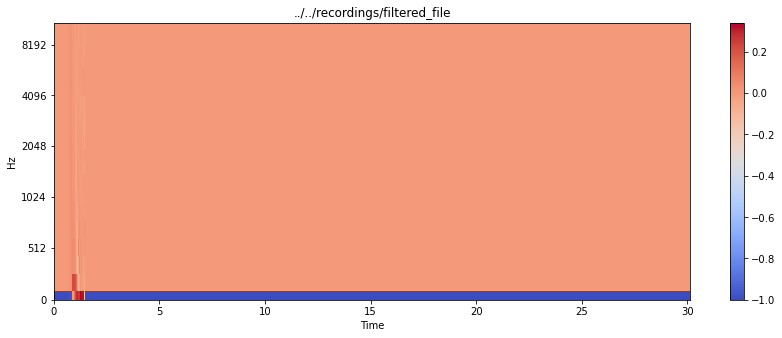

In [15]:
filtered = np.apply_along_axis(bandpass_filter, 0, data).astype('int16')
wavfile.write(os.path.join("../../recordings", 'filtered_file'), samplerate, filtered)
display_feature("../../recordings/filtered_file")

## Bandpass filter

we filter the recordings in order to recognize the audio better

In [16]:
def filter_f(file):
    lo, hi = 300,10000    # those are the cutoffs
    y, sr = librosa.load(file)
    b, a = butter(N=6, Wn=[2*lo/sr, 2*hi/sr], btype='band')
    x = lfilter(b,a,y)
    return x

def extract_song_features(f):
    y, sr = librosa.load(f)
    y = filter_f(f)

    # either use mfcc or melspectrogram; both does not work great
    
    # get Mel-frequency cepstral coefficients and normalize
    mfcc = librosa.feature.mfcc(y)
    mfcc /= np.amax(np.absolute(mfcc))
    
    # get melspectrogram
    #spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
    #spect = librosa.power_to_db(spect, ref=np.max)
    #spect /= np.amax(np.absolute(spect))
    
    #sc = librosa.feature.spectral_centroid(y=y, sr=sr,n_fft=2048, hop_length=1024)
    return np.ndarray.flatten(mfcc)[:25000]

def extract_unfiltered_features(f):
    y, sr = librosa.load(f)
    #y = filter_f(f)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
    spect = librosa.power_to_db(spect, ref=np.max)
    spect /= np.amax(np.absolute(spect))
    return np.ndarray.flatten(spect)[:25000]


# get a song
test_genre = "disco"
some_audio = "../genres/" + test_genre + "/" + test_genre + ".00000.wav"
recorded_audio = "../../recordings/output.wav"

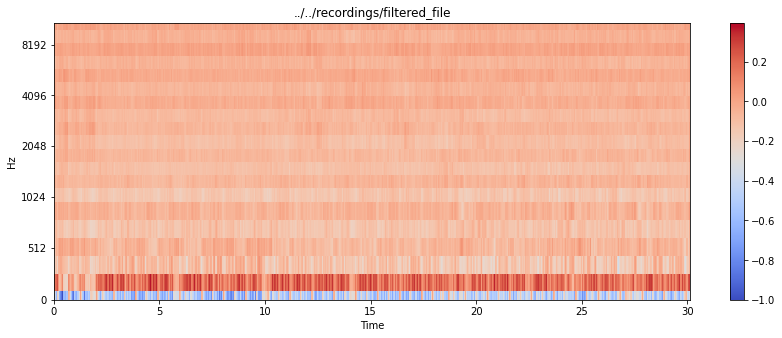

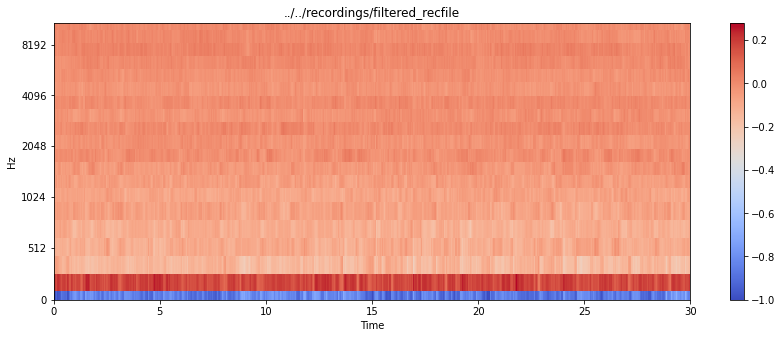

In [17]:
# plot the filtered songs

filtered = filter_f(some_audio)
filtered_rec = filter_f(recorded_audio)
wavfile.write(os.path.join("../../recordings", 'filtered_file'), samplerate, filtered)
wavfile.write(os.path.join("../../recordings", 'filtered_recfile'), samplerate, filtered_rec)
display_feature("../../recordings/filtered_file")
display_feature("../../recordings/filtered_recfile")